# ---PROYECTO DESAFIO ALURA STORE---

  # I. IMPORTACIÓN DE DATOS



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#II. CONFIGURACION DE ENTORNO

In [60]:
import matplotlib.pyplot as plt
import os

 ###        Montar DRIVE y Ruta para respaldo en archivos CSV.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ruta_proyecto = '/content/drive/MyDrive/Colab Notebooks/AluraStore/'

# Verificación
import os

if os.path.exists(ruta_proyecto):
    print("OK. Ruta vinculada correctamente. Listo para guardar reportes.")
else:
    print("ALERTA! La carpeta no se encuentra. Revisa el nombre en tu Drive.")

OK. Ruta vinculada correctamente. Listo para guardar reportes.


  # III. CONOCIENDO LOS DATOS

##       a) Dimensiones de cada base de datos, por tienda.

In [4]:
# Definición de listas maestras
las_tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
bases = [tienda, tienda2, tienda3, tienda4]

resumen_datos = []
for nombre_tienda, df in zip(las_tiendas, bases):
    resumen_datos.append({
        'Base de Datos': nombre_tienda,
        'Filas': df.shape[0],
        'Columnas': df.shape[1]
    })

df_dimensiones = pd.DataFrame(resumen_datos)
print("RESUMEN DE DIMENSIONES")
display(df_dimensiones)

RESUMEN DE DIMENSIONES


,Base de Datos,Filas,Columnas
0,tienda,2359,12
1,tienda2,2359,12
2,tienda3,2359,12
3,tienda4,2358,12


####     *Nota_1: Estructura homogénea; tienda4 tiene 1 fila menos, es inocuo.*

##       b) Verificar la homogeneidad en en los cabezados de columnas y en el orden en cada caso.

In [5]:
columnas_referencia = list(bases[0].columns)

print("VALIDACIÓN DE ESTRUCTURA DE COLUMNAS")
for nombre_tienda, df in zip(las_tiendas, bases):
    if list(df.columns) == columnas_referencia:
        print(f"{nombre_tienda.upper()}: Estructura coincidente.")
    else:
        diferencia = set(columnas_referencia) ^ set(df.columns)
        print(f"{nombre_tienda.upper()}: Discrepancia detectada. Diferencia en: {diferencia}")

VALIDACIÓN DE ESTRUCTURA DE COLUMNAS
TIENDA: Estructura coincidente.
TIENDA2: Estructura coincidente.
TIENDA3: Estructura coincidente.
TIENDA4: Estructura coincidente.


####       *Nota_2: Estructuralmente son coincidentes en ambos aspectos.*

##       c) Verificación de la Calidad de los Datos en las bases.

####       Existencia de datos nulos; tipos de datos; máximos y mínimos y valores únicos.

In [6]:
for nombre_tienda, df in zip(las_tiendas, bases):
    # 1. Cálculos de calidad
    nulos = df.isnull().sum()
    porcentaje_nulos = (nulos / len(df)) * 100
    tipos_datos = df.dtypes
    unicos = df.nunique()

    # 2. Construcción del reporte
    reporte = pd.DataFrame({
        'Columna': nulos.index,
        'Tipo de Dato': tipos_datos.values,
        'Valores Nulos': nulos.values,
        '% Nulos': porcentaje_nulos.values,
        'Valores Únicos': unicos.values
    })
    reporte['% Nulos'] = reporte['% Nulos'].map('{:.2f}%'.format)

    # 3. Salida de Resultados
    print(f"REPORTE DE CALIDAD DE DATOS DE SEDE: {nombre_tienda.upper()}")
    print(f"Estado: {df.shape[0]} filas | {df.duplicated().sum()} duplicados")
    display(reporte)

    # Resumen numérico
    columnas_numericas = df.select_dtypes(include=['number'])
    if not columnas_numericas.empty:
        print(f"Límites numéricos detectados:")
        display(columnas_numericas.describe().loc[['min', 'max']])

    print("\n" + "-" * 85 + "\n")

REPORTE DE CALIDAD DE DATOS DE SEDE: TIENDA
Estado: 2359 filas | 0 duplicados


,Columna,Tipo de Dato,Valores Nulos,% Nulos,Valores Únicos
0,Producto,object,0,0.00%,51
1,Categoría del Producto,object,0,0.00%,8
2,Precio,float64,0,0.00%,1937
3,Costo de envío,float64,0,0.00%,753
4,Fecha de Compra,object,0,0.00%,1018
5,Vendedor,object,0,0.00%,14
6,Lugar de Compra,object,0,0.00%,19
7,Calificación,int64,0,0.00%,5
8,Método de pago,object,0,0.00%,4
9,Cantidad de cuotas,int64,0,0.00%,15


Límites numéricos detectados:


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
min,7600.0,0.0,1.0,1.0,-4.21528,-77.28111
max,2977000.0,160800.0,5.0,24.0,11.54444,-67.92390



-------------------------------------------------------------------------------------

REPORTE DE CALIDAD DE DATOS DE SEDE: TIENDA2
Estado: 2359 filas | 0 duplicados


,Columna,Tipo de Dato,Valores Nulos,% Nulos,Valores Únicos
0,Producto,object,0,0.00%,51
1,Categoría del Producto,object,0,0.00%,8
2,Precio,float64,0,0.00%,1908
3,Costo de envío,float64,0,0.00%,736
4,Fecha de Compra,object,0,0.00%,1025
5,Vendedor,object,0,0.00%,14
6,Lugar de Compra,object,0,0.00%,19
7,Calificación,int64,0,0.00%,5
8,Método de pago,object,0,0.00%,4
9,Cantidad de cuotas,int64,0,0.00%,17


Límites numéricos detectados:


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
min,7600.0,0.0,1.0,1.0,-4.21528,-77.28111
max,2953400.0,162500.0,5.0,24.0,11.54444,-67.92390



-------------------------------------------------------------------------------------

REPORTE DE CALIDAD DE DATOS DE SEDE: TIENDA3
Estado: 2359 filas | 0 duplicados


,Columna,Tipo de Dato,Valores Nulos,% Nulos,Valores Únicos
0,Producto,object,0,0.00%,51
1,Categoría del Producto,object,0,0.00%,8
2,Precio,float64,0,0.00%,1946
3,Costo de envío,float64,0,0.00%,737
4,Fecha de Compra,object,0,0.00%,1024
5,Vendedor,object,0,0.00%,14
6,Lugar de Compra,object,0,0.00%,19
7,Calificación,int64,0,0.00%,5
8,Método de pago,object,0,0.00%,4
9,Cantidad de cuotas,int64,0,0.00%,17


Límites numéricos detectados:


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
min,7600.0,0.0,1.0,1.0,-4.21528,-77.28111
max,2968200.0,158400.0,5.0,24.0,11.54444,-67.92390



-------------------------------------------------------------------------------------

REPORTE DE CALIDAD DE DATOS DE SEDE: TIENDA4
Estado: 2358 filas | 0 duplicados


,Columna,Tipo de Dato,Valores Nulos,% Nulos,Valores Únicos
0,Producto,object,0,0.00%,51
1,Categoría del Producto,object,0,0.00%,8
2,Precio,float64,0,0.00%,1867
3,Costo de envío,float64,0,0.00%,692
4,Fecha de Compra,object,0,0.00%,1030
5,Vendedor,object,0,0.00%,14
6,Lugar de Compra,object,0,0.00%,19
7,Calificación,int64,0,0.00%,5
8,Método de pago,object,0,0.00%,4
9,Cantidad de cuotas,int64,0,0.00%,13


Límites numéricos detectados:


,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
min,7600.0,0.0,1.0,1.0,-4.21528,-77.28111
max,2902200.0,154700.0,5.0,18.0,11.54444,-67.92390



-------------------------------------------------------------------------------------



####      *Nota_3: Fecha tipo object, considerar si se requiere análisis temporal.  Datos de buena calidad.*

##       d) Valores Blanco o cero

In [7]:

for nombre_tienda, df in zip(las_tiendas, bases):
    # 1. Preparación de datos
    precios_cero = (df['Precio'] <= 0).sum()
    ciudades_unicas = df['Lugar de Compra'].unique()
    fechas_temp = pd.to_datetime(df['Fecha de Compra'], dayfirst=True, errors='coerce')

    # 2. Diccionario de hallazgos
    diagnostico = {
        "Métrica": [
            "Precios Inválidos (<= 0)",
            "Total Ciudades Distintas",
            "Fecha Más Antigua",
            "Fecha Más Reciente",
            "¿Tiene Duplicados?"
        ],
        "Resultado": [
            precios_cero,
            len(ciudades_unicas),
            fechas_temp.min().strftime('%d/%m/%Y') if not fechas_temp.dropna().empty else "N/A",
            fechas_temp.max().strftime('%d/%m/%Y') if not fechas_temp.dropna().empty else "N/A",
            "Sí" if df.duplicated().sum() > 0 else "No"
        ]
    }

    # 3. Salida visual
    print(f"ESTADO DE SALUD: {nombre_tienda.upper()}")
    # Usamos set_index para que 'Métrica' sea la etiqueta y no haya índice numérico
    display(pd.DataFrame(diagnostico).set_index('Métrica'))
    print("\n")

ESTADO DE SALUD: TIENDA


,Resultado
Métrica,
Precios Inválidos (<= 0),0
Total Ciudades Distintas,19
Fecha Más Antigua,01/01/2020
Fecha Más Reciente,31/03/2023
¿Tiene Duplicados?,No




ESTADO DE SALUD: TIENDA2


,Resultado
Métrica,
Precios Inválidos (<= 0),0
Total Ciudades Distintas,19
Fecha Más Antigua,01/01/2020
Fecha Más Reciente,31/03/2023
¿Tiene Duplicados?,No




ESTADO DE SALUD: TIENDA3


,Resultado
Métrica,
Precios Inválidos (<= 0),0
Total Ciudades Distintas,19
Fecha Más Antigua,01/01/2020
Fecha Más Reciente,31/03/2023
¿Tiene Duplicados?,No




ESTADO DE SALUD: TIENDA4


,Resultado
Métrica,
Precios Inválidos (<= 0),0
Total Ciudades Distintas,19
Fecha Más Antigua,01/01/2020
Fecha Más Reciente,30/03/2023
¿Tiene Duplicados?,No


####       *Nota_4: Datos son aceptables en este aspecto.*

##       e) Unificación de bases de datos.

####           Estratégia: Economía de código y estándarición de análisis por tienda. Calidad de los datos lo permite.

In [17]:
# Crear base maestra.
bases_con_etiqueta = []

for i in range(len(bases)):
       df_temp = bases[i].copy()
       df_temp['Tienda_ID'] = las_tiendas[i]
       bases_con_etiqueta.append(df_temp)

# Unión en df_maestro.
df_maestro = pd.concat(bases_con_etiqueta, ignore_index=True)

# Validación de la unión de bases.
total_filas_individuales = sum(len(df) for df in bases)
total_filas_maestro = len(df_maestro)

if total_filas_maestro == total_filas_individuales:
    print("CONSOLIDACIÓN EXITOSA")
    print(f"Resultado: Se integraron correctamente {total_filas_maestro} registros.")
    print(f"Validación: La suma de las fuentes coincide con la Base Maestra (Checksum OK).")
else:
    print("ALERTA!: Discrepancia detectada en la consolidación.")
    print(f"Esperado: {total_filas_individuales} | Obtenido: {total_filas_maestro}")


# Vista rápida de la estructura resultante
print("\nESTRUCTURA DE LA BASE MAESTRA:")
df_maestro.info()

# Este archivo será la 'Única Fuente para todos los análisis derivados.
df_maestro.to_csv(ruta_proyecto + 'base_maestra_consolidada.csv',
                  index=False,
                  encoding='utf-8-sig')

print("\n" + "="*59)
print(f"Respaldo generado: 'base_maestra_consolidada.csv' en {ruta_proyecto}")


CONSOLIDACIÓN EXITOSA
Resultado: Se integraron correctamente 9435 registros.
Validación: La suma de las fuentes coincide con la Base Maestra (Checksum OK).

ESTRUCTURA DE LA BASE MAESTRA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon        

# IV ANÁLISIS

# 1. Análisis de facturación

In [18]:
# Matriz de Ventas ($) por Categoría y Tienda
matriz_ventas_dinero = df_maestro.pivot_table(index='Categoría del Producto',
                                              columns='Tienda_ID',
                                              values='Precio',
                                              aggfunc='sum',
                                              fill_value=0)

# Fila de Totales
matriz_ventas_dinero.loc['TOTAL GENERAL'] = matriz_ventas_dinero.sum()

# Variación % (con protección contra división por cero).
totales = matriz_ventas_dinero.loc['TOTAL GENERAL']
max_lider = totales.max()

if max_lider > 0:
    matriz_ventas_dinero.loc['VARIACIÓN % VS LÍDER'] = ((totales - max_lider) / max_lider) * 100
else:
    matriz_ventas_dinero.loc['VARIACIÓN % VS LÍDER'] = 0.0

# Preparación para Visualización (df_display_ventas sin índice)
df_display_ventas = matriz_ventas_dinero.reset_index()

# Manía mía.
print("="*91)
print("REPORTE DE VENTAS POR CATEGORÍA Y BRECHA VS LÍDER")
print("="*91)

# Generación de reporte visual. (Ejecutivo, sin índice en la tabla)
display(df_display_ventas.style.format(
    lambda x: f"{x:.2f}%" if (isinstance(x, (float, int)) and x <= 0 and x > -101) else f"${x:,.2f}",
    subset=df_display_ventas.columns[1:]
).hide(axis='index'))

# EXPORTACIÓN DE DATOS.

# 1. DATA: Valores numéricos puros para motor de graficación.
matriz_ventas_dinero.reset_index().to_csv(ruta_proyecto + 'data_01_ventas.csv',
                                         index=False,
                                         encoding='utf-8-sig')

# 2. REPORTE: Respaldo fiel del informe ejecutivo.
df_display_ventas.to_csv(ruta_proyecto + 'reporte_01_ventas.csv',
                         index=False,
                         encoding='utf-8-sig')

REPORTE DE VENTAS POR CATEGORÍA Y BRECHA VS LÍDER


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,"$12,698,400.00","$14,746,900.00","$15,060,000.00","$15,074,500.00"
Deportes y diversión,"$39,290,000.00","$34,744,500.00","$35,593,100.00","$33,350,100.00"
Electrodomésticos,"$363,685,200.00","$348,567,800.00","$329,237,900.00","$283,260,200.00"
Electrónicos,"$429,493,500.00","$410,831,100.00","$410,775,800.00","$409,476,100.00"
Instrumentos musicales,"$91,299,000.00","$104,990,300.00","$77,380,900.00","$75,102,400.00"
Juguetes,"$17,995,700.00","$15,945,400.00","$19,401,100.00","$20,262,200.00"
Libros,"$8,784,900.00","$10,091,200.00","$9,498,700.00","$9,321,300.00"
Muebles,"$187,633,700.00","$176,426,300.00","$201,072,100.00","$192,528,900.00"
TOTAL GENERAL,"$1,150,880,400.00","$1,116,343,500.00","$1,098,019,600.00","$1,038,375,700.00"
VARIACIÓN % VS LÍDER,0.00%,-3.00%,-4.59%,-9.78%


####      *Nota Ingresos: La **tienda4** tiene los menores ingresos absolutos, distanciándose casi un 10% de la tienda lider, mientras la distancia de las otras dos están bajo el 5%. La diferencia obedece, en lo principal, a un menor desempeño en las categorías Electrónicos (70% aproximadamente), electrodomésticos e instrumentos musicales.*

# 2. Ventas por categoría

In [19]:
# ANALISIS DE COMPOSICIÓN ABSOLUTA DEL MIX DE PRODUCTOS.

# Crea tablamatriz operativa sobre la que trabajar.
matriz_operativa = df_maestro.pivot_table(index='Categoría del Producto',
                                          columns='Tienda_ID',
                                          aggfunc='size',
                                          fill_value=0)

# Cálculo de Totales y Máximos
totales = matriz_operativa.sum(axis=0)
maximos = matriz_operativa.max(axis=0)

# DataFrame de respaldo para guardar la matriz operativa y otras hierbas.
df_respaldo_operativo = matriz_operativa.copy()
df_respaldo_operativo.loc['TOTAL ARTÍCULOS'] = totales
df_respaldo_operativo.loc['MÁXIMO POR CATEGORÍA'] = maximos

# Preparación para Visualización.
df_display = df_respaldo_operativo.reset_index()

# Estética del reporte.
print("\n" + "="*59)
print("ANÁLISIS DE VOLUMEN DE VENTAS FÍSICAS POR TIENDA")
print("=" * 59)

# Generación de reporte visual.
display(df_display.style.format(precision=0).hide(axis='index'))

# EXPORTACIÓN DE DATOS.
# 1. DATA: Valores numéricos puros para graficar volumen.
df_respaldo_operativo.reset_index().to_csv(ruta_proyecto + 'data_02_volumen.csv',
                                          index=False,
                                          encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de volumen.
df_display.to_csv(ruta_proyecto + 'reporte_02_volumen.csv',
                  index=False,
                  encoding='utf-8-sig')


# ------ANÁLISIS DE COMPOSICIÓN RELATIVA-------.

sumas_tiendas = matriz_operativa.sum()
df_participacion = matriz_operativa.divide(sumas_tiendas, axis=1).fillna(0) * 100

# Preparación para Visualización (df_display_pct sin índice)
df_display_pct = df_participacion.reset_index()

# Estética del reporte.
print("\n" + "="*59)
print("ANÁLISIS DE IMPORTANCIA % DE MIX VENTA FÍSICA POR TIENDA")
print("="*59)

# Generación de reporte visual.
display(df_display_pct.style.format(precision=2,
                                    formatter="{:.2f}%",
                                    subset=df_display_pct.columns[1:])
        .hide(axis='index'))

# EXPORTACIÓN DE DATOS.
# 1. DATA: Valores numéricos puros para graficar participación.
df_participacion.reset_index().to_csv(ruta_proyecto + 'data_03_participacion.csv',
                                      index=False,
                                      encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de participación.
df_display_pct.to_csv(ruta_proyecto + 'reporte_03_participacion.csv',
                      index=False,
                      encoding='utf-8-sig')



ANÁLISIS DE VOLUMEN DE VENTAS FÍSICAS POR TIENDA


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480
TOTAL ARTÍCULOS,2359,2359,2359,2358
MÁXIMO POR CATEGORÍA,465,442,499,480



ANÁLISIS DE IMPORTANCIA % DE MIX VENTA FÍSICA POR TIENDA


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,7.25%,7.67%,7.50%,8.52%
Deportes y diversión,12.04%,11.66%,11.74%,11.75%
Electrodomésticos,13.23%,12.93%,11.78%,10.77%
Electrónicos,18.99%,17.89%,19.12%,19.13%
Instrumentos musicales,7.72%,9.50%,7.50%,7.21%
Juguetes,13.73%,13.27%,13.35%,14.33%
Libros,7.33%,8.35%,7.84%,7.93%
Muebles,19.71%,18.74%,21.15%,20.36%


####      *Nota Ventas Físicas: Se observa que en el caso de la categoría Electrónicos, la que explica en lo principal las menores ventas de la tienda4, las unidades vendidas son del mismo orden de magnitud que el de la tienda líder, ergo, es un  tema del precio y no de la cantidad. Se observa, además, que el mix de ventas es similar en términos de la importancia relativa en cada tienda, lo que se refuerza la observación precedente. Una tabla con las ventas promedio puede mostrar esto.*

#### **Análisis complementario derivado de observación precedente.**

In [20]:
# Matriz de ventas promedio (Ticket Promedio)
matriz_ticket_medio = df_maestro.pivot_table(index='Categoría del Producto',
                                             columns='Tienda_ID',
                                             values='Precio',
                                             aggfunc='mean',
                                             fill_value=0)

# Promedio de todas las categorías por tienda para la fila final.
promedios_globales = matriz_ticket_medio.mean()
matriz_ticket_medio.loc['PROMEDIO GENERAL TICKET'] = promedios_globales

# Preparación para Visualización (df_display_ticket sin índice)
df_display_ticket = matriz_ticket_medio.reset_index()

# Definición de lógica de resaltado de mínimos.
def resaltar_minimo(s):
    is_min = s == s.min()
    return ['background-color: #f2dede; color: #a94442; font-weight: bold' if v else '' for v in is_min]

# Estetica reporte.
print("="*78)
print("ANÁLISIS DE PRECIO PROMEDIO (TICKET MEDIO POR CATEGORÍA)")
print("Resaltado: Menor desempeño de valor por categoría.")
print("="*78)

# Generación de reporte visual.
display(df_display_ticket.style.format(precision=2,
                                  formatter="${:,.2f}",
                                  subset=df_display_ticket.columns[1:])
        .apply(resaltar_minimo, axis=1, subset=df_display_ticket.columns[1:])
        .hide(axis='index'))

# EXPORTACIÓN DE DATOS.

# 1. DATA: Valores numéricos puros para graficar el Ticket Promedio.
matriz_ticket_medio.reset_index().to_csv(ruta_proyecto + 'data_04_ticket_promedio.csv',
                                        index=False,
                                        encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de Ticket Promedio.
df_display_ticket.to_csv(ruta_proyecto + 'reporte_04_ticket_promedio.csv',
                         index=False,
                         encoding='utf-8-sig')

ANÁLISIS DE PRECIO PROMEDIO (TICKET MEDIO POR CATEGORÍA)
Resaltado: Menor desempeño de valor por categoría.


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,"$74,259.65","$81,474.59","$85,084.75","$74,997.51"
Deportes y diversión,"$138,345.07","$126,343.64","$128,494.95","$120,397.47"
Electrodomésticos,"$1,165,657.69","$1,142,845.25","$1,184,308.99","$1,115,197.64"
Electrónicos,"$958,690.85","$973,533.41","$910,811.09","$907,929.27"
Instrumentos musicales,"$501,642.86","$468,706.70","$437,180.23","$441,778.82"
Juguetes,"$55,542.28","$50,943.77","$61,590.79","$59,947.34"
Libros,"$50,779.77","$51,224.37","$51,344.32","$49,846.52"
Muebles,"$403,513.33","$399,154.52","$402,950.10","$401,101.88"
PROMEDIO GENERAL TICKET,"$418,553.94","$411,778.28","$407,720.65","$396,399.56"


####      *Nota Precios Promedio: La tienda4 tiene el peor ticket promedio de la cadena en 6 de las 8 categorías. Es posible que ya no se trate de una variación aleatoria, sino un patrón de bajo rendimiento.*

# 3. Calificación promedio de la tienda


In [21]:
# Debido a que se usa base maestra, groupby('Tienda_ID') ayuda a separar los datos en grupos individuales, uno por cada tienda.

# Generación de matriz base y cálculo de Índice Global ponderado.
matriz_base = df_maestro.pivot_table(index='Categoría del Producto',
                                    columns='Tienda_ID',
                                    values='Calificación',
                                    aggfunc='mean')

# Inyección de fila de desempeño global.
matriz_base.loc['ÍNDICE DE SATISFACCIÓN GLOBAL'] = df_maestro.groupby('Tienda_ID')['Calificación'].mean()

# Preparación para Visualización.
df_display_sat = matriz_base.reset_index()

# Lógica de resaltado.
def resaltar_puntos_criticos(s):
    if s.name == 'Categoría del Producto': return [''] * len(s)
    is_min = s == s.min()
    return ['color: #C0392B; font-weight: bold; background-color: #FDEDEC' if v else '' for v in is_min]

# Estética del reporte visual.
print("=" * 75)
print("SATISFACCIÓN POR CATEGORÍA Y NODO (TIENDA)")
print("Metodología: Promedio Ponderado para el Índice Global de Desempeño.")
print("=" * 75)

# Generación de reporte visual.
display(df_display_sat.style.hide(axis='index')
    .format(precision=2, subset=df_display_sat.columns[1:])
    .apply(resaltar_puntos_criticos, axis=1, subset=df_display_sat.columns[1:])
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#1c2833'), ('color', 'white'), ('text-align', 'center'), ('padding', '12px')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '10px'), ('border-bottom', '1px solid #ebedef')]},
        {'selector': 'tr:last-child', 'props': [('background-color', '#f4f6f7'), ('font-weight', 'bold'), ('border-top', '2px solid #1c2833')]}
    ]))

# EXPORTACIÓN DE DATOS.

# 1. DATA: Valores numéricos puros para graficar satisfacción.
matriz_base.reset_index().to_csv(ruta_proyecto + 'data_05_satisfaccion.csv',
                                index=False,
                                encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de satisfacción.
df_display_sat.to_csv(ruta_proyecto + 'reporte_05_satisfaccion.csv',
                    index=False,
                    encoding='utf-8-sig')

SATISFACCIÓN POR CATEGORÍA Y NODO (TIENDA)
Metodología: Promedio Ponderado para el Índice Global de Desempeño.


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,3.75,4.07,4.07,4.01
Deportes y diversión,3.90,4.07,3.94,4.05
Electrodomésticos,4.03,4.07,4.01,3.93
Electrónicos,4.00,3.97,3.99,4.01
Instrumentos musicales,4.05,4.04,4.01,3.91
Juguetes,4.08,4.03,4.20,3.99
Libros,3.98,3.95,4.05,4.04
Muebles,3.95,4.09,4.10,4.00
ÍNDICE DE SATISFACCIÓN GLOBAL,3.98,4.04,4.05,4.00


####      *Nota Satisfación Cliente: Si bien la sucursal tienda tiene le menor calificación de los clientes vemos que la nota en las tres categorias que generan mayor valor son aceptables. En contraste, la tienda4 tiene las peores calificaciones en dos de las tres categorias en revisión, electrodomésticos e instrumentos musicales.*

# 4. Productos más y menos vendidos

In [22]:
# Identificación de extremos de ingresos por Tienda.
df_temp_dinero = df_maestro.groupby(['Tienda_ID', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Productos de mayor y menor aporte financiero.
df_resumen_dinero = df_temp_dinero.sort_values('Precio').groupby('Tienda_ID').agg(
    ingreso_top=('Categoría del Producto', 'last'),
    ingreso_low=('Categoría del Producto', 'first')
).reset_index()

# Encabezados para Reporte Ejecutivo y Resguardo.
df_resumen_dinero.columns = ['Tienda_ID', 'Producto Mayor Ingreso', 'Producto Menor Ingreso']

# Estética del reporte visual.
print("=" * 63)
print("APORTE AL FLUJO DE CAJA")
print("Foco: Productos con mayor y menor aporte.")
print("=" * 63)

# Generación de reporte visual.
display(df_resumen_dinero.style.hide(axis='index')
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#1c2833'), ('color', 'white'), ('text-align', 'center'), ('padding', '12px')]},
        {'selector': 'td', 'props': [('text-align', 'left'), ('padding', '10px'), ('border-bottom', '1px solid #ebedef')]}
    ]))

# EXPORTACIÓN DE DATOS. (No hay diferencia en los datos, pero con robustes de arquitectura se hará igualmente)

# 1. DATA: Respaldo de etiquetas para segmentación o filtros.
df_resumen_dinero.to_csv(ruta_proyecto + 'data_06_extremos_ingresos.csv',
                         index=False,
                         encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de extremos.
df_resumen_dinero.to_csv(ruta_proyecto + 'reporte_06_extremos_ingresos.csv',
                         index=False,
                         encoding='utf-8-sig')

APORTE AL FLUJO DE CAJA
Foco: Productos con mayor y menor aporte.


Tienda_ID,Producto Mayor Ingreso,Producto Menor Ingreso
tienda,Electrónicos,Libros
tienda2,Electrónicos,Libros
tienda3,Electrónicos,Libros
tienda4,Electrónicos,Libros


In [23]:
# 1. Identificación de perfiles de ventas físicas.

# Productos de mayor y menor frecuencia transaccional por tienda.
df_extremos_ventas = df_maestro.groupby('Tienda_ID')['Categoría del Producto'].agg(
    Producto_Mas_Vendido=lambda x: x.value_counts().idxmax(),
    Producto_Menos_Vendido=lambda x: x.value_counts().idxmin()
).reset_index()

# Preparar encabezados para Reporte Ejecutivo y Resguardo.
df_extremos_ventas.columns = ['Tienda_ID', 'Producto Más Vendido', 'Producto Menos Vendido']

# Estética del reporte visual.
print("=" * 60)
print("PRODUCTOS LÍDERES Y REZAGADOS POR SUCURSAL")
print("Foco: Unidades físicas más y menos vendidas.")
print("=" * 60)

# Generación de reporte visual.
display(df_extremos_ventas.style.hide(axis='index')
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#1c2833'), ('color', 'white'), ('text-align', 'center'), ('padding', '12px')]},
        {'selector': 'td', 'props': [('text-align', 'left'), ('padding', '10px'), ('border-bottom', '1px solid #ebedef')]}
    ]))

# EXPORTACIÓN DE DATOS.

# 1. DATA: Respaldo de perfiles para segmentación.
df_extremos_ventas.to_csv(ruta_proyecto + 'data_07_extremos_volumen.csv',
                          index=False,
                          encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de líderes y rezagados.
df_extremos_ventas.to_csv(ruta_proyecto + 'reporte_07_extremos_volumen.csv',
                          index=False,
                          encoding='utf-8-sig')

PRODUCTOS LÍDERES Y REZAGADOS POR SUCURSAL
Foco: Unidades físicas más y menos vendidas.


Tienda_ID,Producto Más Vendido,Producto Menos Vendido
tienda,Muebles,Artículos para el hogar
tienda2,Muebles,Artículos para el hogar
tienda3,Muebles,Instrumentos musicales
tienda4,Muebles,Instrumentos musicales


####       *Nota Productos más y menos vendidos. Al cruzar los productos de mayor/menor ingreso con los de mayor/menor volumen de ventas, se observa que en todas las tiendas Electrónicos es el líder indiscutible en ingresos, pero Muebles es el producto más vendido. Esto puede significar que el cliente va a la tienda buscando equipar su hogar (muebles) y termina realizando la inversión fuerte en dispositivos electrónicos. Osea, para todas las tiendas el perfil del cliente es idéntico en lo que desea comprar (Muebles/Electrónicos), pero difiere ligeramente en lo que decide ignorar. La homogeneidad es del 90%, lo cual es ideal para una operación escalable. Esto refuerza que la tienda4 tiene un peor desempeño y no se explica por los clientes*

# 5. Envío promedio por tienda

####      _*Nota Costo envío: Si bien la sucursal tienda4 tiene el menor costo de envío de los clientes vemos que la nota en las tres categorias que generan mayor valor son aceptables. En contraste, la tienda4 tiene las peores calificaciones en dos de las tres categorias en comento._

In [24]:
# Preparación de la matriz comparativa de costos logísticos
df_pivot_logistica = df_maestro.pivot_table(index='Categoría del Producto',
                                            columns='Tienda_ID',
                                            values='Costo de envío',
                                            aggfunc='mean')

# Cálculo del promedio logístico total por tienda (Añadido al final de la matriz)
df_pivot_logistica.loc['COSTO PROMEDIO LOGÍSTICO TOTAL'] = df_maestro.groupby('Tienda_ID')['Costo de envío'].mean()

# Lógica de resaltado usando s.name (identidad de la fila/columna)
def resaltar_eficiencia_logistica(s):
    # s.name aquí representa el índice (Categoría del Producto)
    is_min = s == s.min()
    return ['background-color: #D5F5E3; color: #145A32; font-weight: bold' if v else '' for v in is_min]

# Preparación para reporte.
df_display_logistica = df_pivot_logistica.reset_index()

# Estética del reporte visual.
print("=" * 83)
print("LOGÍSTICA: COSTOS MÍNIMOS POR CATEGORÍA Y NODO")
print("Leyenda: Las celdas verdes indican la tienda con el costo de envío más eficiente.")
print("=" * 83)

# Generación de reporte visual.
display(df_display_logistica.style.hide(axis='index')
    .apply(resaltar_eficiencia_logistica, axis=1, subset=df_display_logistica.columns[1:])
    .format('${:,.2f}', subset=df_display_logistica.columns[1:])
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#1c2833'), ('color', 'white'), ('text-align', 'center'), ('padding', '12px')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '10px'), ('border-bottom', '1px solid #ebedef')]},
        {'selector': 'tr:last-child', 'props': [('background-color', '#f4f6f7'), ('font-weight', 'bold'), ('border-top', '2px solid #1c2833')]}
    ]))

# EXPORTACIÓN DE DATOS.

# 1. DATA: Valores numéricos puros para análisis de costos y eficiencia.
df_pivot_logistica.reset_index().to_csv(ruta_proyecto + 'data_08_logistica.csv',
                                        index=False,
                                        encoding='utf-8-sig')

# 2. REPORTE: Respaldo del informe ejecutivo de costos de envío.
df_display_logistica.to_csv(ruta_proyecto + 'reporte_08_logistica.csv',
                             index=False,
                             encoding='utf-8-sig')

LOGÍSTICA: COSTOS MÍNIMOS POR CATEGORÍA Y NODO
Leyenda: Las celdas verdes indican la tienda con el costo de envío más eficiente.


Categoría del Producto,tienda,tienda2,tienda3,tienda4
Artículos para el hogar,"$3,764.91","$4,424.31","$4,589.83","$4,249.25"
Deportes y diversión,"$7,468.66","$6,826.55","$6,942.60","$6,390.25"
Electrodomésticos,"$61,935.90","$60,838.03","$62,928.78","$59,143.70"
Electrónicos,"$51,258.26","$51,692.42","$48,460.98","$48,399.78"
Instrumentos musicales,"$26,834.62","$24,811.16","$23,213.56","$23,258.24"
Juguetes,"$3,023.15","$2,835.78","$3,306.98","$3,291.42"
Libros,"$2,699.42","$2,821.32","$2,683.24","$2,891.44"
Muebles,"$21,494.41","$21,348.64","$21,611.42","$21,323.54"
COSTO PROMEDIO LOGÍSTICO TOTAL,"$26,018.61","$25,216.24","$24,805.68","$23,459.46"


####      *Nota costo envíos*. Laa tienda4 ofrece, en promedio, los envíos más económicos para el cliente. Sin embargo, como vimos en el análisis anterior, es la que peor satisfacción tiene en categorías clave como Instrumentos musicales y Electrodomésticos.*

## VISUALIZACION

####      Para facilitar el trabajo, ya que usaré los archivos data para graficar quiero tener a la vista los campos estrictos.

In [61]:
# Lista de los archivos data.
archivos_data = [
    'data_01_ventas.csv', 'data_02_volumen.csv', 'data_03_participacion.csv',
    'data_04_ticket_promedio.csv', 'data_05_satisfaccion.csv',
    'data_06_extremos_ingresos.csv', 'data_07_extremos_volumen.csv',
    'data_08_logistica.csv'
]

print("ESTRUCTURA DE ARCHIVOS DATA PARA GRAFICOS:\n" + "="*80)

for archivo in archivos_data:
    ruta_completa = ruta_proyecto + archivo
    if os.path.exists(ruta_completa):
        temp_df = pd.read_csv(ruta_completa)
        print(f"ARCHIVO: {archivo}")
        print(f"COLUMNAS: {temp_df.columns.tolist()}")
        # Muestra las primeras 2 filas de la primera columna para ver las etiquetas de "Categoría"
        print(f"EJEMPLO FILAS: {temp_df.iloc[:, 0].head(3).tolist()}")
        print("-" * 80)
    else:
        print(f"Alerta! El archivo {archivo} no se encontró en la ruta.")

ESTRUCTURA DE ARCHIVOS DATA PARA GRAFICOS:
ARCHIVO: data_01_ventas.csv
COLUMNAS: ['Categoría del Producto', 'tienda', 'tienda2', 'tienda3', 'tienda4']
EJEMPLO FILAS: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos']
--------------------------------------------------------------------------------
ARCHIVO: data_02_volumen.csv
COLUMNAS: ['Categoría del Producto', 'tienda', 'tienda2', 'tienda3', 'tienda4']
EJEMPLO FILAS: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos']
--------------------------------------------------------------------------------
ARCHIVO: data_03_participacion.csv
COLUMNAS: ['Categoría del Producto', 'tienda', 'tienda2', 'tienda3', 'tienda4']
EJEMPLO FILAS: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos']
--------------------------------------------------------------------------------
ARCHIVO: data_04_ticket_promedio.csv
COLUMNAS: ['Categoría del Producto', 'tienda', 'tienda2', 'tienda3', 'tienda4']
E

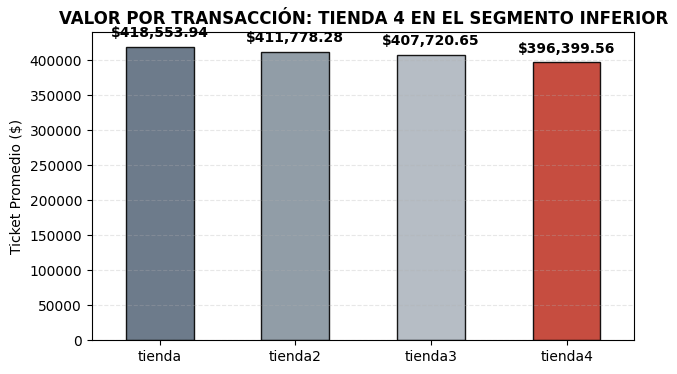

In [64]:
# Carga de ticket promedio
df_tp = pd.read_csv(ruta_proyecto + 'data_04_ticket_promedio.csv')
ticket_promedio = df_tp.iloc[:-1, 1:5].mean()

plt.figure(figsize=(7, 4))
ax = ticket_promedio.plot(kind='bar', color=colores, edgecolor='black', alpha=0.9)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.title('VALOR POR TRANSACCIÓN: TIENDA 4 EN EL SEGMENTO INFERIOR', fontsize=12, fontweight='bold')
plt.ylabel('Ticket Promedio ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

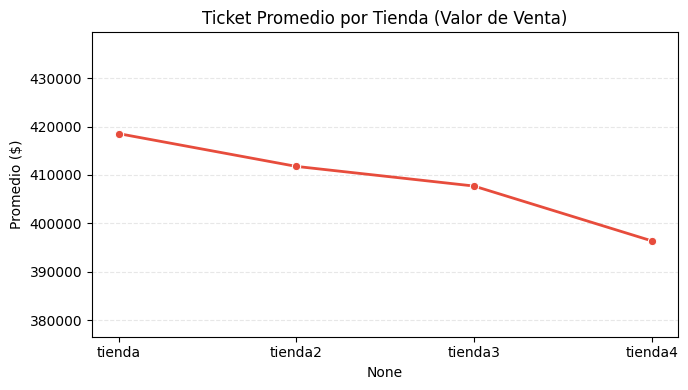

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_tp = pd.read_csv(ruta_proyecto + 'data_04_ticket_promedio.csv')
df_tp = df_tp[~df_tp['Categoría del Producto'].str.contains('PROMEDIO GENERAL', case=False, na=False)]

ticket_medio = df_tp[['tienda', 'tienda2', 'tienda3', 'tienda4']].mean()

plt.figure(figsize=(7, 4))
sns.lineplot(x=ticket_medio.index, y=ticket_medio.values, marker='o', color='#E74C3C', linewidth=2)

plt.title('Ticket Promedio por Tienda (Valor de Venta)', fontsize=12)
plt.ylim(ticket_medio.min() * 0.95, ticket_medio.max() * 1.05)
plt.ylabel('Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

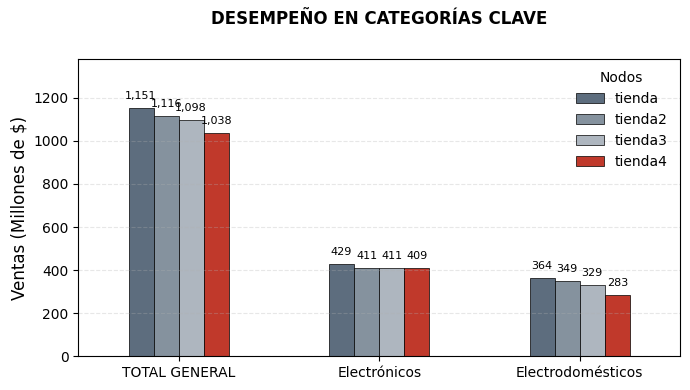

In [70]:
# 1. Carga y preparación (Top 3 impulsores)
df_v = pd.read_csv(ruta_proyecto + 'data_01_ventas.csv')
df_top = df_v.iloc[:-1].copy()
df_top['Total_Global'] = df_top[['tienda', 'tienda2', 'tienda3', 'tienda4']].sum(axis=1)
impulsores = df_top.sort_values('Total_Global', ascending=False).head(3)

# 2. Conversión a Millones y Redondeo a Enteros.
impulsores_plot = impulsores.set_index('Categoría del Producto')[['tienda', 'tienda2', 'tienda3', 'tienda4']]
df_final = (impulsores_plot / 1_000_000).round(0).astype(int)

# 3. Gráfico.
plt.figure(figsize=(7, 4))
colores = ['#5D6D7E', '#85929E', '#AEB6BF', '#C0392B']
ax = df_final.plot(kind='bar', color=colores, edgecolor='black', linewidth=0.5, ax=plt.gca())

# 4. Etiquetas de datos: Enteros puros.
for p in ax.patches:
    valor = int(p.get_height())
    if valor >= 0:
        ax.annotate(f'{valor:,}',
                    (p.get_x() + p.get_width() / 2., valor),
                    ha='center', va='bottom', fontsize=8, fontweight='normal',
                    xytext=(0, 5), textcoords='offset points')

# 5. Estética Final
plt.title('DESEMPEÑO EN CATEGORÍAS CLAVE', fontsize=12, fontweight='bold', pad=25)
plt.ylabel('Ventas (Millones de $)', fontsize=12)
plt.xlabel(None)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0, df_final.values.max() * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Nodos', frameon=False)

plt.tight_layout()
plt.show()

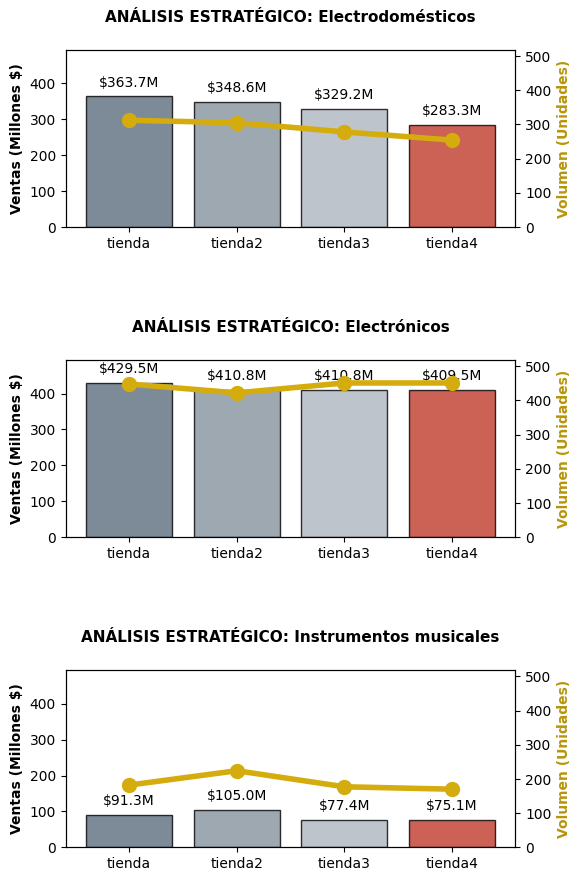

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carga y Limpieza.
df_v = pd.read_csv(ruta_proyecto + 'data_01_ventas.csv')
df_u = pd.read_csv(ruta_proyecto + 'data_02_volumen.csv')

# Filtro para excluir filas que no son categorías (Totales/Máximos)
df_v_c = df_v[~df_v['Categoría del Producto'].str.contains('TOTAL|MÁXIMO', na=False, case=False)]
df_u_c = df_u[~df_u['Categoría del Producto'].str.contains('TOTAL|MÁXIMO', na=False, case=False)]

tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']
colores = ['#5D6D7E', '#85929E', '#AEB6BF', '#C0392B']
categorias = ['Electrodomésticos', 'Electrónicos', 'Instrumentos musicales']

# 2. Preparación de datos y cálculo de techos globales
datos_v = []
datos_u = []

for cat in categorias:
    v = df_v_c[df_v_c['Categoría del Producto'] == cat][tiendas].values.flatten() / 1_000_000
    u = df_u_c[df_u_c['Categoría del Producto'] == cat][tiendas].values.flatten()
    datos_v.append(v)
    datos_u.append(u)

# Escalas maestras: esto garantiza que la comparación sea "honesta" visualmente
max_money = max([v.max() for v in datos_v]) * 1.15
max_units = max([u.max() for u in datos_u]) * 1.15

# 3. Visualización Vertical (1 columna, 3 filas)
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

for i, ax in enumerate(axes):
    axb = ax.twinx()

    # BARRAS: Dinero ($M)
    bars = ax.bar(tiendas, datos_v[i], color=colores, edgecolor='black', alpha=0.8)

    # LÍNEA: Unidades (Escala real)
    axb.plot(tiendas, datos_u[i], color='#D4AC0D', marker='o', linewidth=4, markersize=10)

    # Aplicación de límites globales
    ax.set_ylim(0, max_money)
    axb.set_ylim(0, max_units)

    # Etiquetas y Formato (Línea corregida aquí)
    ax.set_title(f'ANÁLISIS ESTRATÉGICO: {categorias[i]}', fontweight='bold', size=11, pad=20)
    ax.set_ylabel('Ventas (Millones $)', fontweight='bold')
    axb.set_ylabel('Volumen (Unidades)', fontweight='bold', color='#B7950B')

    # Etiquetas de datos para lectura rápida
    for p in bars:
        ax.annotate(f'${p.get_height():.1f}M', (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='normal', xytext=(0, 5), textcoords='offset points')

plt.tight_layout(pad=5.0)
plt.show()

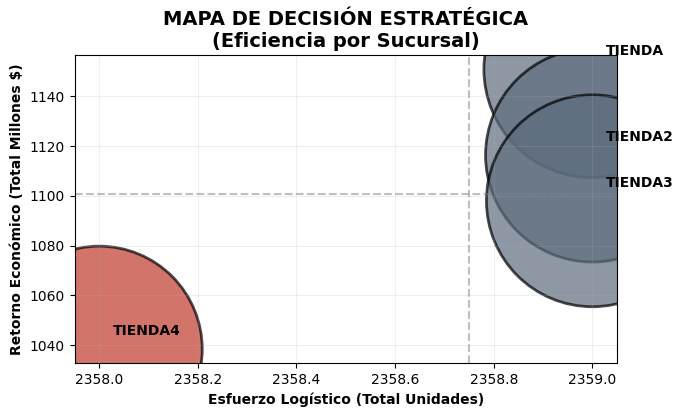

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Preparación de Totales Reales
# (Sumamos las categorías una a una para evitar usar las filas de 'TOTAL' del CSV)
tiendas = ['tienda', 'tienda2', 'tienda3', 'tienda4']

# Filtramos para tener solo filas de categorías reales
df_v_clean = df_v[~df_v['Categoría del Producto'].str.contains('TOTAL|MÁXIMO', na=False, case=False)]
df_u_clean = df_u[~df_u['Categoría del Producto'].str.contains('TOTAL|MÁXIMO', na=False, case=False)]

# Calculamos el desempeño global por tienda
resumen = []
for t in tiendas:
    v_total = df_v_clean[t].sum() / 1_000_000
    u_total = df_u_clean[t].sum()
    resumen.append({'Tienda': t.upper(), 'Ventas_M': v_total, 'Unidades': u_total, 'Ticket_Promedio': v_total/u_total})

df_res = pd.DataFrame(resumen)

# 2. Gráfico de Dispersión Consolidado
plt.figure(figsize=(7, 4))
colores = ['#5D6D7E', '#5D6D7E', '#5D6D7E', '#C0392B'] # Rojo solo para la T4

plt.scatter(df_res['Unidades'], df_res['Ventas_M'], s=df_res['Ticket_Promedio']*50000,
            c=colores, alpha=0.7, edgecolor='black', linewidth=2)

# Añadimos etiquetas a los puntos
for i, row in df_res.iterrows():
    plt.annotate(row['Tienda'], (row['Unidades'], row['Ventas_M']),
                 xytext=(10, 10), textcoords='offset points', fontweight='bold')

# Líneas de referencia (Promedios)
plt.axhline(df_res['Ventas_M'].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(df_res['Unidades'].mean(), color='gray', linestyle='--', alpha=0.5)

plt.title('MAPA DE DECISIÓN ESTRATÉGICA\n(Eficiencia por Sucursal)', fontweight='bold', size=14)
plt.xlabel('Esfuerzo Logístico (Total Unidades)', fontweight='bold')
plt.ylabel('Retorno Económico (Total Millones $)', fontweight='bold')
plt.grid(True, alpha=0.2)
plt.show()

#   JUSTIFICACIÓN ESTRATÉGICA PARA LA TOMA DE DECISIONES

## El proyecto consiste en asesorar al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos

## **"Cuando el volumen no compra la rentabilidad"**

###  1. Diagnóstico de Desempeño y Brecha de Ingresos.
Los registros financieros confirman que la Tienda 4 registra los menores ingresos absolutos de la organización. Se observa una brecha de casi un 10% respecto a la tienda líder, cifra que duplica la varianza del resto de la red. Este diferencial negativo indica una pérdida de competitividad crítica, explicada principalmente por el rendimiento en las categorías core: Electrónicos, Electrodomésticos e Instrumentos musicales.

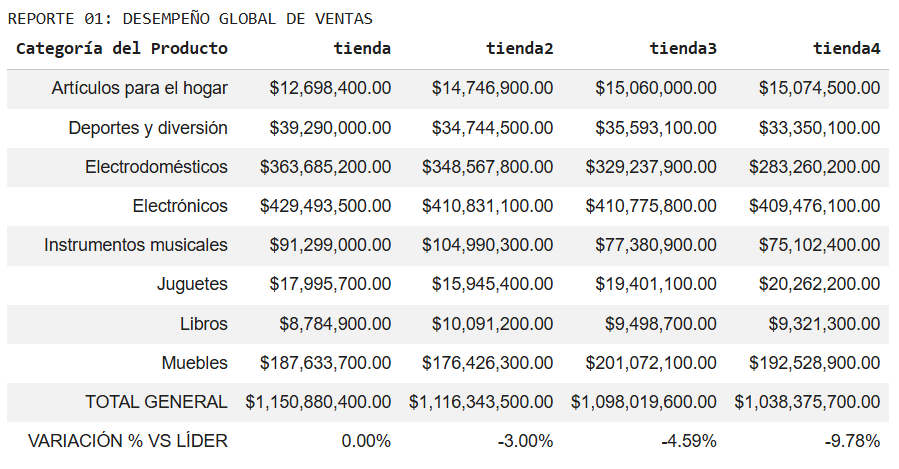

###  2. Paradoja de Eficiencia: Unidades vs. Valor.

Un cruce de variables revela que, en la categoría Electrónicos, la Tienda 4 moviliza un volumen de unidades similar al de la sucursal líder, pero genera un 70% menos de ingresos.

Inferencia: Dado que el esfuerzo operativo es equivalente pero el retorno es marginal, se puede presumir una erosión severa del precio de venta. Esto hace pensar que la sucursal opera con márgenes que no logran cubrir eficientemente la estructura de costos fijos.

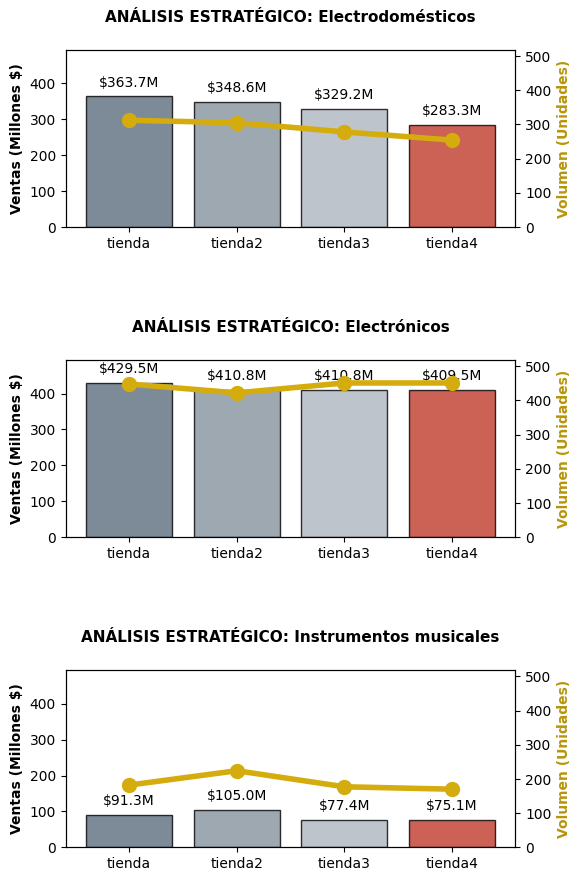

###   3. Patrón Sistémico en el Ticket Promedio.

La data revela que la Tienda 4 sostiene el ticket promedio más bajo en 6 de las 8 categorías comerciales (75% de la operación). La consistencia de este indicador indica que no estamos ante una anomalía puntual, sino que sugiere un patrón estructural de baja captura de valor por cliente.

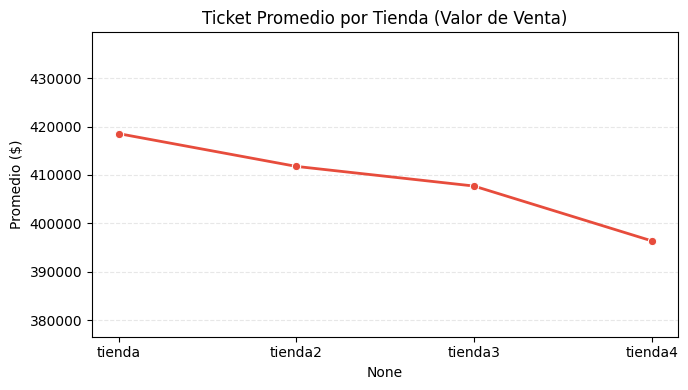

###   4. Disonancia entre Satisfacción y Estrategia Logística.

A pesar de ofrecer los costos de envío más bajos de la cadena, la sucursal posee las peores calificaciones en categorías de alta especialidad.

Hipótesis de gestión: La coexistencia de envíos económicos con baja satisfacción hace pensar que el incentivo de precio no compensa las deficiencias en el servicio. Se puede presumir que la sucursal intenta mitigar fallas operativas con subsidios logísticos inefectivos.

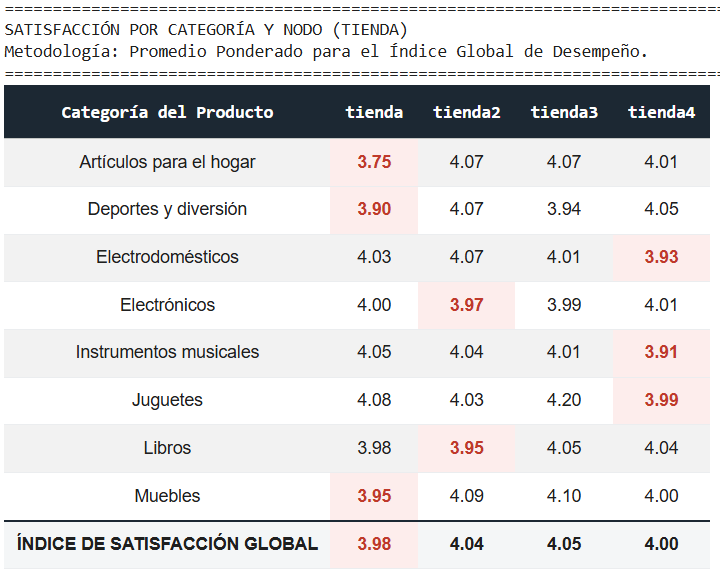

### 5. Validación por Homogeneidad de Mercado y Recomendación Final.

El análisis de mix de productos muestra una coincidencia del 90% en el comportamiento de compra en toda la red. Esta homogeneidad indica que el perfil de demanda es consistente. Por lo tanto, se puede presumir que el bajo desempeño de la Tienda 4 es atribuible exclusivamente a factores de ejecución interna.

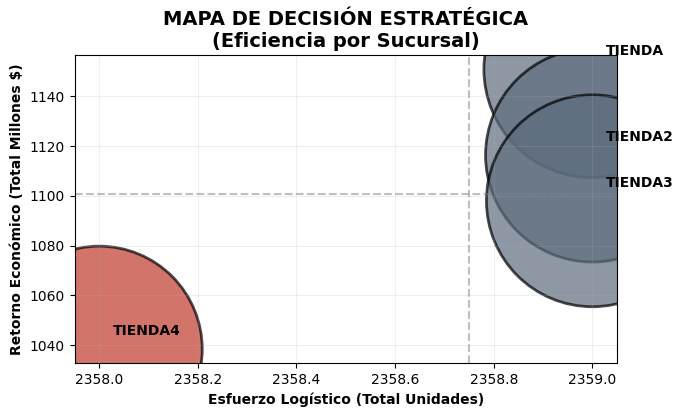

### Conclusión.

Basado en esta evidencia técnica, **se recomienda la desinversión de la Tienda 4** para financiar el nuevo emprendimiento del Sr. Juan, optimizando así el capital hacia unidades con mayor capacidad de generación de valor.